## Assignment №5

##### Author: [Radoslav Neychev](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [11]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import FashionMNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output
import torch.optim as optim

### Task #1:
Let's revisit the handwritten digit recognition problem we covered before. We will be working with the [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. For this task, we will use the entire dataset as a whole.

Your main task is to implement the entire model training pipeline and achieve an accuracy of $\geq 88.5\%$ on the test set.

The code for training the model is missing in this task. There are only a few tests that will help you debug your solution. For an example, you can refer to the notebooks from previous lessons.

In [2]:
# do not change the code in the block below
# __________start of block__________
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# __________end of block__________

100%|██████████| 26421880/26421880 [00:01<00:00, 13752701.08it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 297568.12it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4937889.19it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22704812.82it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Text(0.5, 1.0, 'Image label: 4')

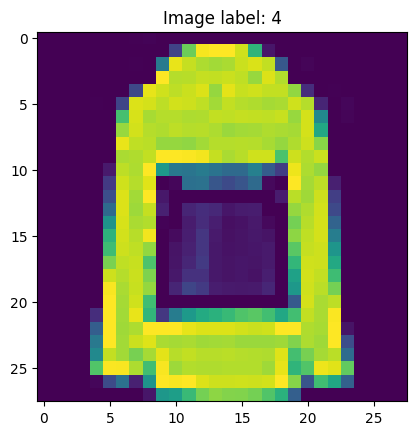

In [3]:
# do not change the code in the block below
# __________start of block__________

train_fmnist_data = FashionMNIST(
    ".", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_fmnist_data = FashionMNIST(
    ".", train=False, transform=torchvision.transforms.ToTensor(), download=True
)


train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data, batch_size=32, shuffle=True, num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_fmnist_data, batch_size=32, shuffle=False, num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f"Image label: {_label}")
# __________end of block__________

Build the model below. Please do not build an overly complicated network; it should not be deeper than four layers (it can be fewer). Your main task is to train the model and achieve at least 88.5% accuracy on the test set (hold-out set).

__Note, your model should be represented by the variable `model`. It should take a batch of input tensors of dimension (1, 28, 28).__

In [55]:
# Creating model instance

# your code here
# Creating model instance
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,32)
    self.fc4 = nn.Linear(32,10)


  def forward(self,x):
    x = x.view(-1,28*28)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x),dim=1)
    return x

model = NN() # your code here

Do not forget to move your model to the `device`!

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [57]:
model.to(device)

NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

Local tests are coming next:

In [58]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, "Please, use `model` variable to store your model"

try:
    x = random_batch[0].to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print("Something is wrong with the model")
    raise e


assert y_predicted.shape[-1] == 10, "Model should predict 10 logits/probas"

print("Everything seems fine!")
# __________end of block__________

Everything seems fine!


Train the model on the training set. Also we recommend you to vary the `learning rate`.

In [65]:
# your code here
criterion  = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)
epochs = 10
for epoch in range(epochs):
  total_loss = 0
  for images,labels in train_data_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(total_loss)

371.324420819059
357.5780809801072
350.6489733289927
344.61823071166873
338.86679763905704
334.07046578638256
330.15341816004366
325.6808091122657
321.3425728864968
316.87777380645275


Also, remember that you can always refer to the excellent [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).

Let's evaluate the classification quality:

In [66]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [67]:
print(f"Neural network accuracy on train set: {train_acc:3.5}")

Neural network accuracy on train set: 0.9371


In [68]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].to(device))
        predicted_labels.append(y_predicted.argmax(dim=1).cpu())
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [69]:
print(f"Neural network accuracy on test set: {test_acc:3.5}")

Neural network accuracy on test set: 0.8885


Check that the necessary thresholds are passed:

In [70]:
assert test_acc >= 0.885, "Train accuracy is below 0.885 threshold"
assert (
    train_acc >= 0.905
), "Test accuracy is below 0.905 while test accuracy is fine. We recommend to check your model and data flow"

### Submitting the Assignment
Upload the file `hw10_data_dict.npy` (link is on the assignment page) and run the code below to generate your submission.

In [71]:
!wget https://github.com/girafe-ai/ml-course/raw/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy

--2024-02-20 14:03:26--  https://github.com/girafe-ai/ml-course/raw/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy [following]
--2024-02-20 14:03:27--  https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw10_fmnist/hw10_data_dict.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272446 (6.0M) [application/octet-stream]
Saving to: ‘hw10_data_dict.npy’

hw10_data_dict.npy  100%[===================>]   5.98M  --.-KB/s    in 0.07s   

2024-02-20 14:03:2

In [73]:
# do not change the code in the block below
# __________start of block__________
import os
import json


assert os.path.exists(
    "hw10_data_dict.npy"
), "Please, download `hw10_data_dict.npy` and place it in the working directory"


def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx : idx + step].to(device))
            predicted_labels.append(y_predicted.argmax(dim=1).cpu())

    predicted_labels = torch.cat(predicted_labels)
    predicted_labels = ",".join([str(x) for x in list(predicted_labels)])
    return predicted_labels


loaded_data_dict = np.load("hw10_data_dict.npy", allow_pickle=True)

submission_dict = {
    "train": get_predictions(
        model, torch.FloatTensor(loaded_data_dict.item()["train"])
    ),
    "test": get_predictions(model, torch.FloatTensor(loaded_data_dict.item()["test"])),
}

with open("submission_dict_hw05.json", "w") as iofile:
    json.dump(submission_dict, iofile)
print("File saved to `submission_dict_hw05.json`")
# __________end of block__________

File saved to `submission_dict_hw05.json`


With that, the task is complete. Congratulations!